# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

# Описания полей

* age	- возраст
* gender	- пол repexc_date
* city_type	- Тип города проживания клиента
* full_mob	- Длительность взаимоотношений с банком


* ml_balance	- ипотека
* cl_balance_0m	- потребительский кредит
* loan_balance_0m	- все кредиты
* td_balance_0m	- депозит
* casa_balance_0m	- счета


* dc_trx_cnt	- количество трат по картам
* dc_trx_sum	- сумма трат по картам
* Avg_trx	- средний размер транзакции
* avgtrx_to_balance	- отношение среднего размера транзакции к балансу


* min_casa_balance_1q	- показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	- показатели по счетам за год


* min_td_balance_1q	    - показатели по депозитам за квартал
* max_td_balance_1q	
* avg_td_balance_1Y	    - показатели по депозитам за год


* min_loan_balance_1q	   - показатели по всем кредитам за квартал	
* max_loan_balance_1q	
* avg_loan_balance_1Y	   - показатели по всем кредитам за год


* min_cl_balance_1q		- показатели по потребительским кредитам за квартал
* max_cl_balance_1q	
* avg_cl_balance_1Y	    - показатели по потребительским кредитам за год	
* loan_to_deposit	- отношение кредитов к депозитам


* income	- доход клиента
* nbi	- доход от клиента без OPEX (чистый бизнес доход)

### План:
1. [Загрузим и изучим данные](#researchdata)  
2. [Изучим и визуализируем данные](#analyzedata)  

<a name="researchdata"></a>

## Загрузим и изучим данные

Импортируем библиотеки:

In [635]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

Загружаем файл с данными клиентов банка:

In [636]:
data_client = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')

data_client.head(15)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.00,0.0,0.000000e+00,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.00,0.0,3.272937e+03,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.00,0.0,6.249755e+03,6,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,854.670000,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.00,0.0,1.435494e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.00,0.0,9.151177e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562
5,72,М,Mega,50,0.0,0.0,0.00,0.0,9.369080e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,2433.644326
6,46,NaN,<100,81,0.0,0.0,0.00,0.0,5.350795e+03,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,177.408546
7,62,NaN,<100,56,0.0,0.0,0.00,0.0,4.783591e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,1284.357885
8,39,NaN,100-500,13,0.0,0.0,0.00,0.0,2.919013e+06,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,17397.286761
9,36,М,<100,154,0.0,0.0,32413.52,0.0,0.000000e+00,83,...,32413.52,34119.49,38051.374167,0.0,0.0,0.0,NaN,3915.032892,4.383411,6065.052515


**Посмотрим на общую информацию по датасету и предобработаем данные**

In [637]:
data_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

Типы данных соответствуют указанным данным в столбцах.

**Проверим дубликаты**

In [638]:
data_client.duplicated().sum()

26

Т.к. дубликаты составляют совсем малую часть от общих данных, удалим дубли, чтобы не засорять датасет

In [639]:
data_client = data_client.drop_duplicates()

**Посмотрим на пропуски в данных**

In [640]:
data_client.isnull().sum()

age                        0
gender                   723
city_type                  0
full_mob                   0
ml_balance                 0
cl_balance_0m              0
loan_balance_0m            0
td_balance_0m              0
casa_balance_0m            0
dc_trx_cnt                 0
dc_trx_sum                 0
income                     0
min_casa_balance_1q        0
max_casa_balance_1q        0
avg_casa_balance_1Y        0
min_td_balance_1q          0
max_td_balance_1q          0
avg_td_balance_1Y          0
min_loan_balance_1q        0
max_loan_balance_1q        0
avg_loan_balance_1Y        0
min_cl_balance_1q          0
max_cl_balance_1q          0
avg_cl_balance_1Y          0
loan_to_deposit        46154
Avg_trx                17846
avgtrx_to_balance      18459
nbi                     2406
dtype: int64

Пропуски в колонках с полом (gender) составляют незначительную часть в общем объеме, но в целом они не помешают нам исследовать датасет, оставим их.

Больше всего пропусков в колонке loan_to_deposit (отношение кредитов к депозитам), что может говорить о том, что клиенты не пользуются этими услугами. Пропусков слишком много, их нельзя ни удалить, ни предзаполнить другими данными, оставим как есть.

Примерно равное количество пропусков в колонках Avg_trx (средний размер транзакции) и avgtrx_to_balance (отношение среднего размера транзакции к балансу) - возможно, они относятся к тем клиентам, которые за выбранное время при выгрузке датасета не совершали транзакции. Они могут быть интересны нам по другим данным, их удалять тоже не будем.

Также небольшая часть (по отношению к общим данным) пропусков есть в колонке nbi (чистый бизнес доход от клиента). Оставим эти пропуски в датасете, чтобы исседовать клиентов по другим данным.

*Таким образом, на текущем этапе мы не будем вычищать из данных никакие пропуски.*



По данным видно, что у нас нет столбца с уникальными идентификаторами, добавим столбец с индексами, он поможет нам считать уникальных клиентов

In [641]:
data_client.reset_index(inplace=True)

data_client.head()

,index,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


Пропуски в колонках с полом (gender) составляют незначительную часть в общем объеме, но в целом они не помешают нам исследовать датасет, оставим их.

Больше всего пропусков в колонке loan_to_deposit (отношение кредитов к депозитам), что может говорить о том, что клиенты не пользуются этими услугами. Пропусков слишком много, их нельзя ни удалить, ни предзаполнить другими данными, оставим как есть.

Примерно равное количество пропусков в колонках Avg_trx (средний размер транзакции) и avgtrx_to_balance (отношение среднего размера транзакции к балансу) - возможно, они относятся к тем клиентам, которые за выбранное время при выгрузке датасета не совершали транзакции. Они могут быть интересны нам по другим данным, их удалять тоже не будем.

Также небольшая часть (по отношению к общим данным) пропусков есть в колонке nbi (чистый бизнес доход от клиента). Оставим эти пропуски в датасете, чтобы исседовать клиентов по другим данным.

*Таким образом, на текущем этапе мы не будем вычищать из данных никакие пропуски.*



**Посмотрим на значения в колонах с помощью описательных статистик (метод describe)**

Отдельно рассмотрим статистики для столбцов, которые показывают качественные данные, и отдельно - количественные.

***Качественные значения***

In [642]:
# пол и тип города проживания

data_client[['gender', 'city_type']].describe()

,gender,city_type
count,49251,49974
unique,2,5
top,М,<100
freq,25388,15406


По половому признаку видим, что мужчин среди клиентов больше, правда, не на много, всего на 1,5 п.п. ((25388 / 49251) * 100 = 51,5%).
Здесь никаких инсайтов нет, возможно, они появятся в связке с другими значениями.

По типу города проживания доля 30% у клиентов из городов <100 ((15406 / 49974) * 100 = 30.8%). Всего типов городов 5. К ним ещё вернёмся позже, чтобы рассмотреть поподробней.

***Количественные значения***

Будем смотреть данные отдельными группами.

In [643]:
# возраст и длительность взаимоотношений с банком

data_client[['age','full_mob']].describe()

,age,full_mob
count,49974.000000,49974.000000
mean,41.526654,53.670409
std,12.866757,47.427322
min,4.000000,0.000000
25%,32.000000,13.000000
50%,40.000000,37.000000
75%,51.000000,81.000000
max,98.000000,236.000000


Средний возраст клиентов - 41 год, самому молодому клиенту - 4 года (счёт открыли на ребёнка? либо некорректные данные в датасете), самому старшему - 98 лет. При этом не более 75% наших клиентов моложе 51 года.

Судя по максимальному значению длительности взаимоотношений с банком 236 и значениям в 50 и 75 перцентилях, данные в этом столбце, скорее всего, измеряются в месяцах (в годах - слишком много, в днях - слишком мало). Эти данные мы также посмотрим позже поподробней.

In [644]:
# ипотека, потребительский кредит, все кредиты, депозит, счета

data_client[['ml_balance', 'cl_balance_0m', 'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m']].describe()

,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m
count,4.997400e+04,4.997400e+04,4.997400e+04,4.997400e+04,4.997400e+04
mean,1.288815e+04,6.036830e+04,8.130726e+04,7.005946e+04,6.864382e+04
std,1.874990e+05,2.018042e+05,2.860859e+05,1.679846e+06,1.749322e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.416750e+01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.615200e+02
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.771190e+03
max,1.467568e+07,7.354568e+06,1.467568e+07,3.305000e+08,2.474474e+08


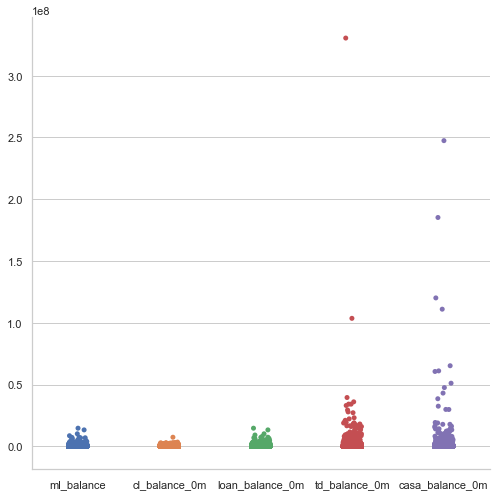

In [645]:
sns.catplot(data = data_client[['ml_balance', 'cl_balance_0m', 'loan_balance_0m', 
                                 'td_balance_0m', 'casa_balance_0m']], height=7);

Данные показывают, что у большинства наших клиентов нет ни ипотеки, ни кредитов, на депозитах деньги хранят также немногие (не более 25%).

А вот на счетах в среднем лежит около 68000, но при этом не более чем у половины клиентов на счетах меньше 761, а у 75% - не более 8771.

In [646]:
# количество трат по картам, сумма трат по картам, средний размер транзакции, отношение среднего размера транзакции к балансу

data_client[['dc_trx_cnt', 'dc_trx_sum', 'Avg_trx', 'avgtrx_to_balance']].describe()

,dc_trx_cnt,dc_trx_sum,Avg_trx,avgtrx_to_balance
count,49974.000000,4.997400e+04,3.212800e+04,3.151500e+04
mean,105.066034,2.208556e+05,5.279361e+03,3.384532e+02
std,192.722910,6.009374e+05,1.598972e+04,2.936955e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000e+00,8.143703e+02,8.005211e-02
50%,14.000000,3.517921e+04,1.716181e+03,3.017687e-01
75%,122.750000,2.605961e+05,4.416583e+03,1.532015e+00
max,2970.000000,3.634105e+07,1.749500e+06,5.000000e+06


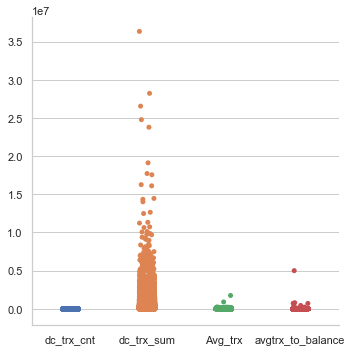

In [647]:
sns.catplot(data = data_client[['dc_trx_cnt', 'dc_trx_sum', 'Avg_trx', 'avgtrx_to_balance']], height=5);

У половины клиентов количество трат по картам не более 14, общая сумма - не более 35179. При этом средний размер транзации у половины клиентов - не более 1716, отношение среднего размера транзакции к балансу - 0,3.

In [648]:
# показатели по счетам за квартал (min, max), средние показатели по счетам за год

data_client[['min_casa_balance_1q', 'max_casa_balance_1q', 'avg_casa_balance_1Y']].describe()

,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y
count,4.997400e+04,4.997400e+04,4.997400e+04
mean,5.516768e+04,9.285023e+04,6.559088e+04
std,1.699372e+06,2.754850e+06,1.899512e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.652500e+00,2.440975e+02,4.416696e+02
50%,2.228600e+02,3.663360e+03,3.031704e+03
75%,3.618247e+03,2.157640e+04,1.297028e+04
max,2.474474e+08,4.461676e+08,3.103200e+08


Среднее значение max показателя по счетам за квартал почти в 2 раза больше min показателя. Если смотреть по перцентилям: не более чем у половины max показатель превышает показатель min в 16,5 раз (3663 / 222), не более чем у 75% - в 6 раз (21576 / 3618).

Средний годовой показатель по счетам у половины клиентов не превышает 3031.

In [649]:
# показатели по депозитам за квартал (min, max), средние показатели по депозитам за год

data_client[['min_td_balance_1q', 'max_td_balance_1q', 'avg_td_balance_1Y']].describe(
                                                                 percentiles = [.5, .75, .90, .95, .99])

,min_td_balance_1q,max_td_balance_1q,avg_td_balance_1Y
count,4.997400e+04,4.997400e+04,4.997400e+04
mean,6.034382e+04,7.627020e+04,7.116044e+04
std,9.716618e+05,1.763411e+06,1.115324e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00
90%,0.000000e+00,0.000000e+00,0.000000e+00
95%,7.000000e+03,1.000000e+05,1.776610e+05
99%,1.310455e+06,1.400000e+06,1.350000e+06
max,1.332600e+08,3.473500e+08,1.616579e+08


Как мы видим, у 90% клиентов на депозитах пусто, ими практически никто не пользуется.

In [650]:
# показатели по всем кредитам за квартал (min, max), средние показатели по всем кредитам за год

data_client[['min_loan_balance_1q', 'max_loan_balance_1q', 'avg_loan_balance_1Y']].describe(
                                                                 percentiles = [.5, .75, .79, .80, .90])

,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y
count,4.997400e+04,4.997400e+04,4.997400e+04
mean,7.538621e+04,8.879750e+04,7.895314e+04
std,2.758838e+05,3.004779e+05,2.749794e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,3.988511e+03
79%,0.000000e+00,2.999211e+04,3.519744e+04
80%,9.892992e+03,4.196721e+04,4.562833e+04
90%,2.219249e+05,2.798832e+05,2.444764e+05
max,1.467568e+07,1.481199e+07,1.502391e+07


Кредиты берут не более 20% клиентов. Квартальное отношение их min показателя к max: 1 к 4 (41967 / 9892), а среднее значение за год - 45628.

In [651]:
# показатели по потребительским кредитам за квартал (min, max), средние показатели по потребительским кредитам за год
# отношение кредитов к депозитам

data_client[['min_cl_balance_1q', 'max_cl_balance_1q', 'avg_cl_balance_1Y', 'loan_to_deposit']].describe(
                                                                 percentiles = [.5, .75, .80, .85, .90])

,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit
count,4.997400e+04,4.997400e+04,4.997400e+04,3820.000000
mean,5.559062e+04,6.512895e+04,5.537293e+04,18.236559
std,1.897342e+05,2.113722e+05,1.725558e+05,269.329001
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
80%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
85%,1.832075e+04,5.556097e+04,6.314409e+04,0.000000
90%,1.583726e+05,2.048856e+05,1.789286e+05,0.000000
max,5.646888e+06,7.501889e+06,4.112823e+06,12521.279170


По потребительским кредитам ситуация ситуация примерно такая же: 80% клиентов не брали потребительский кредит. Те, кто брал потребительский кредит (не менее 15% клиентов), взяли в среднем на сумму 63144.

In [652]:
# доход клиента, доход от клиента без OPEX (чистый бизнес доход)

data_client[['income', 'nbi']].describe(percentiles = [.5, .75, .80, .85, .90])

,income,nbi
count,4.997400e+04,4.756800e+04
mean,2.602185e+04,1.205403e+04
std,4.361109e+05,4.532169e+04
min,0.000000e+00,1.684957e-04
50%,0.000000e+00,1.379670e+03
75%,3.164562e+04,9.781994e+03
80%,3.928565e+04,1.464306e+04
85%,4.855100e+04,2.248580e+04
90%,6.210826e+04,3.499448e+04
max,9.060000e+07,4.691796e+06


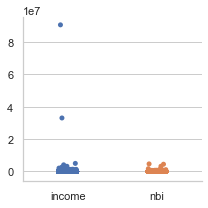

In [653]:
sns.catplot(data = data_client[['income', 'nbi']], height=3);

По половине клиентов у нас нет данных о доходе, причём это не пропуски, а нулевые значения. По 1/4 клиентов у нас есть данные, их доходы в районе 31645. Также у нас есть клиент с доходом 90 600 000 - это максимальное значение в наших данных о доходах.

Чистый средний доход от клиента в районе 12054, не более чем по половине клиентов - 1379, по 25% - 9781. Самый максимальный доход по одному из клиентов 4 691 796, самый минимальный - 0,0001 :)

***Выводы по всем данным***

- По половому признаку данные распределились примерно поровну, мужчин среди клиентов больше всего на 1,5 п.п.
- Типов городов проживания у нас 5 в текущих данных.  30% клиентов из городов <100.
- Средний возраст клиентов - 41 год. При этом 75% наших клиентов моложе 51 года. 
- Данные о длительности взаимоотношений, скорее всего, измеряются в месяцах, их рассмотрим позже подробнее.
- Данные показывают, что у большинства наших клиентов нет ни ипотеки, ни кредитов. Кредиты берут не более 20% клиентов.
- Депозитами пользуются ещё меньше: у 90% клиентов на депозитах пусто.
- А вот на счетах в среднем лежит около 68000, но при этом не более чем у половины клиентов на счетах меньше 761, а у 75% - не более 8771. На среднее значение оказывают влияние клиенты с большими суммами на счетах.
- Квартальные показатели говорят нам, что среднее значение max показателя по счетам за квартал почти в 2 раза больше min показателя. При этом годовой средний показатель по счетам у половины клиентов не превышает 3031.
- Половина клиентов совершила не более 14 транзакций (трат по картам) на общую сумму не более 35179. При этом средний размер транзации у половины клиентов - не более 1716, а отношение среднего размера транзакции к балансу - 0,3.
- По половине клиентов у нас нет данных о доходе. По 1/4 клиентов у нас есть данные, их доходы в районе 31645. Максимальное значение в наших данных о доходах - 90 600 000.
- Чистый средний доход от клиента в районе 12054, при этом не более чем по половине клиентов доход составляет 1379, по 25% - 9781. Самый максимальный доход по одному из клиентов 4 691 796.

<a name="analyzedata"></a>

## Изучим и визуализируем данные

**Типы городов**

На этапе исследования статистических данных мы хотели вернуться к данным о типах городов в нашем датасете.

Посмотрим, какие типы городов есть в выборке и сколько клиентов каждого типа. 

In [654]:
data_client['city_type'].value_counts()

<100        15406
100-500     10725
Mega         8951
1M+          7905
500-1000     6987
Name: city_type, dtype: int64

Сохраним их в отдельную таблицу

In [655]:
city_type_client_count = (data_client.groupby('city_type')['index'].count()
                                     .sort_values(ascending=False)
                                     .reset_index()
                                     .head(10))
city_type_client_count.columns = ['city_type', 'count']

city_type_client_count

,city_type,count
0,<100,15406
1,100-500,10725
2,Mega,8951
3,1M+,7905
4,500-1000,6987


Посмотрим на распределение клиентов по типам городов на графике

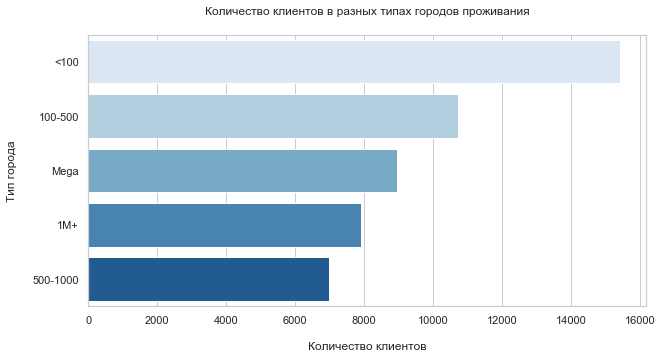

In [656]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (10, 5))

sns.barplot(data = city_type_client_count,
            x = 'count', 
            y = 'city_type',
            palette = 'Blues')

plt.title('Количество клиентов в разных типах городов проживания', pad=20)
plt.xlabel('Количество клиентов', labelpad = 15)
plt.ylabel('Тип города', labelpad = 15)
plt.show();

Посмотрим на это же распределение в долях в виде pie-чарта

In [657]:
fig = px.pie(city_type_client_count, 
             values='count', names='city_type', title='Распределение клиентов в разных типах городов проживания',
             width=600, height=400)
fig.show()

***Выводы***

Самый популярный сегмент из типов городов - это <100, как мы это и вычислили ранее. 

А города с населением ***500-1000 - самый неохваченный сегмент***, в них клиентов меньше всего по сравнению с другими типами.

**Длительность взаимоотношений с банком**

На этапе статистического исследования мы также планировали повнимательней посмотреть на данные о длительности взаимоотношений с банком.
Посмотрим, какие значения у нас есть в колонке с этим показателем

In [658]:
data_client['full_mob'].unique()

array([103,  81,  50,  56,  13, 154, 165,  40,   3,  37, 156,  63,  52,
        10, 152,  26,   9,  78,  68,  49, 141,  34,  22,   0, 157,  11,
        99,  29, 108,  90,  27,   1,  75,  30,  84, 117,  54,  74,  79,
       105,  42,  12,  16,   2,  21,  24,  46,  18,  94,  33,  14, 128,
        36,  44,  80,  35,  67,  62, 102,  41,   6,  23,  53,   5,  85,
       158, 104,  25,  39,  15,  20,  88,  55,  66,  98,  72,   4,  73,
         8, 101, 106, 137,  38, 166,  76,   7,  17, 124,  31,  92, 134,
        93,  19,  58,  89, 135, 123, 139,  70, 167,  69, 160, 120,  32,
       111, 145,  28,  51,  64,  82, 163, 122,  59, 144, 162,  48, 140,
        57, 107, 109,  43, 100, 161, 142, 129,  77,  86, 151, 121, 148,
        61, 118, 159, 115, 125,  65,  60, 110,  91, 150, 132,  95, 164,
       136, 153, 131, 146,  87,  71, 133, 176, 127,  97, 155, 138,  47,
       130,  45, 143, 168, 114,  83, 172, 149, 147, 116, 126, 112, 169,
       113,  96, 178, 119, 173, 181, 170, 236, 171, 174, 185, 21

Ранее на основе описательских статистик мы предположили, что данные показывают длительность в месяцах, но однозначный вывод сделать нельзя. Судя по полученным значениям, данные исчисляются либо в днях, либо в месяцах, будем смотреть на них как на условные единицы.

Построим гистограмму распределения клиентов в зависимости от периода взаимоотношений с банком

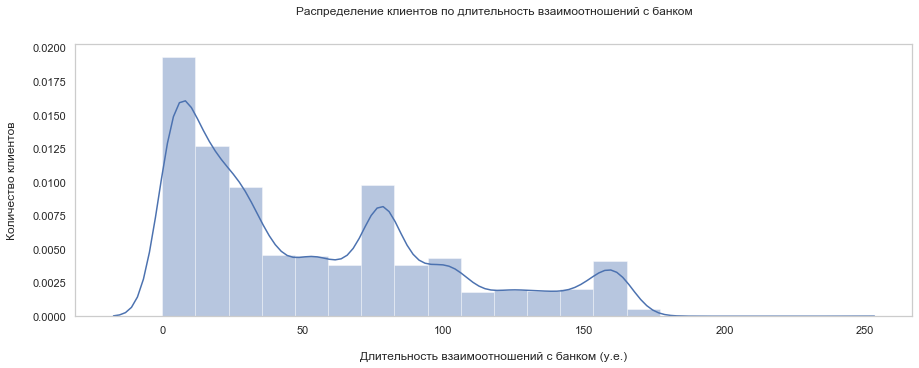

In [659]:
fig, ax = plt.subplots(figsize=(15, 5)) 

sns.distplot(data_client['full_mob'], bins=20)
plt.title('Распределение клиентов по длительность взаимоотношений с банком', pad = 30)
plt.xlabel('Длительность взаимоотношений с банком (y.e.)', labelpad = 15)
plt.ylabel('Количество клиентов', labelpad = 15)
plt.grid()
plt.show();

***Выводы***

Видим, что среди клиентов ***много новичков*** (от 0 до 30 у.е.). Есть ещё один выделяющий сегмент - клиенты, которые с банком уже 70 у.е.

**Возраст клиентов**

Из качественных признаков в нашем датасете есть ещё пол и возраст клиентов. Зависимость других значений от пола рассмотрим позже, а сейчас можно посмотреть на распределение клиентов по возрасту наглядно

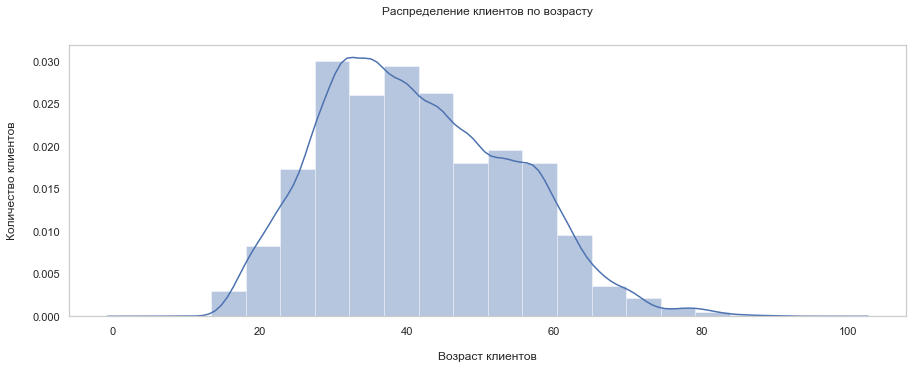

In [660]:
fig, ax = plt.subplots(figsize=(15, 5)) 

sns.distplot(data_client['age'], bins=20)
plt.title('Распределение клиентов по возрасту', pad = 30)
plt.xlabel('Возраст клиентов', labelpad = 15)
plt.ylabel('Количество клиентов', labelpad = 15)
plt.grid()
plt.show();

Мы видим вполне ожидаемую картину: основная часть наших клиентов - работающее население в возрасте ***от 25 до 60 лет***. Небольшие пики есть у данных, соответствующий возрастам 30 и 40 лет.

**Корреляция между данными**

Мы выяснили, что большинство клиентов не берут кредиты (ипотека, потребительский, все кредиты) и не пользуются депозитами. Поэтому рассмотрим, как между собой коррелируют остальные данные, при этом на всякий случай оставим колонки с общими данными по всем кредитам (loan_balance_0m) и депозитам (td_balance_0m) - возможно, в них также обнаружатся какие-нибудь зависимости.

In [661]:
# выделим нужные параметры в отдельный список

parameters = ['age', 'full_mob',
             'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m',
             'dc_trx_cnt', 'dc_trx_sum', 'Avg_trx', 'avgtrx_to_balance',
             'income', 'nbi']

# сохраним данные в отдельную таблицу

data_parameters = data_client[parameters]
data_parameters.head()

,age,full_mob,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,Avg_trx,avgtrx_to_balance,income,nbi
0,71,103,0.0,0.0,0.0000,0,0.00,NaN,NaN,0.0,NaN
1,49,81,0.0,0.0,3272.9367,0,0.00,NaN,NaN,0.0,28.762952
2,56,81,0.0,0.0,6249.7550,6,5128.02,854.67,0.083467,0.0,1973.335539
3,47,81,0.0,0.0,14354.9370,0,0.00,NaN,NaN,0.0,364.008556
4,74,81,0.0,0.0,91511.7691,0,0.00,NaN,NaN,0.0,6651.416562


Переименуем столбцы, чтобы было понятней, какие данные мы смотрим

In [662]:
data_parameters.columns = ['возраст', 'длит_отн', 
                         'кредиты', 'депозиты', 'счета',
                         'кол-во_трат', 'сумма_трат', 'ср_транзакц', 'транзакц_к_балансу',
                         'доход_клиент', 'чист_доход_бизнес']                           

data_parameters.head()

,возраст,длит_отн,кредиты,депозиты,счета,кол-во_трат,сумма_трат,ср_транзакц,транзакц_к_балансу,доход_клиент,чист_доход_бизнес
0,71,103,0.0,0.0,0.0000,0,0.00,NaN,NaN,0.0,NaN
1,49,81,0.0,0.0,3272.9367,0,0.00,NaN,NaN,0.0,28.762952
2,56,81,0.0,0.0,6249.7550,6,5128.02,854.67,0.083467,0.0,1973.335539
3,47,81,0.0,0.0,14354.9370,0,0.00,NaN,NaN,0.0,364.008556
4,74,81,0.0,0.0,91511.7691,0,0.00,NaN,NaN,0.0,6651.416562


Построим таблицу корреляции между значениями таблицы

In [663]:
corr = data_parameters.corr()
corr

,возраст,длит_отн,кредиты,депозиты,счета,кол-во_трат,сумма_трат,ср_транзакц,транзакц_к_балансу,доход_клиент,чист_доход_бизнес
возраст,1.000000,0.278054,0.010089,0.049816,0.026662,-0.117831,0.030467,0.103702,0.000874,0.009501,0.061652
длит_отн,0.278054,1.000000,0.130793,0.013942,0.011652,0.066793,0.114760,0.032694,-0.005283,0.010590,0.110468
кредиты,0.010089,0.130793,1.000000,-0.011184,-0.005755,0.046443,0.069511,0.041081,0.001041,0.022894,0.369048
депозиты,0.049816,0.013942,-0.011184,1.000000,0.664374,-0.002064,0.080089,0.046300,0.000233,0.002912,0.574840
счета,0.026662,0.011652,-0.005755,0.664374,1.000000,0.029803,0.181761,0.054488,-0.000507,0.008149,0.769900
кол-во_трат,-0.117831,0.066793,0.046443,-0.002064,0.029803,1.000000,0.477702,-0.147866,-0.008283,0.038162,0.057230
сумма_трат,0.030467,0.114760,0.069511,0.080089,0.181761,0.477702,1.000000,0.158789,-0.003323,0.057160,0.263217
ср_транзакц,0.103702,0.032694,0.041081,0.046300,0.054488,-0.147866,0.158789,1.000000,0.019519,0.054947,0.086635
транзакц_к_балансу,0.000874,-0.005283,0.001041,0.000233,-0.000507,-0.008283,-0.003323,0.019519,1.000000,-0.004796,0.003607
доход_клиент,0.009501,0.010590,0.022894,0.002912,0.008149,0.038162,0.057160,0.054947,-0.004796,1.000000,0.026677


Отобразим корреляцию на тепловой карте

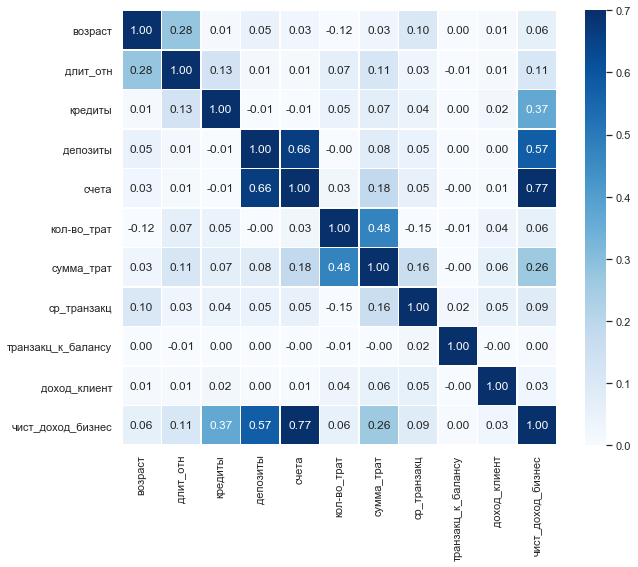

In [664]:
fig, ax = plt.subplots(figsize=(10,8)) 

sns.heatmap(corr, annot=True, square = True, fmt='.2f',linewidths=.5, cmap="Blues", vmax= 0.7, vmin=0, ax=ax);

***Выводы***

Высокая корреляция (больше 0.7) между: 
- суммой на счёте и чистым доходом от клиента (0.77)

Средняя корреляция (от 0.5 до 0.7) между: 
- суммой на счете и депозите (0.66),
- депозитом и чистым доходом от клиента (0.57),
- кол-вом и суммой трат (0.48)

Слабая корреляция (от 0.3 до 0.5) между:
- суммой кредита и чистым доходом от клиента (0.37),
- возрастом и длительностью взаимоотношений с банком (0.28),
- суммой трат и чистым доходом от клиента (0.26).

Между остальными признаками корреляция очень слабая (от 0 до 0.3).


**Мужчины vs Женщины**

Посмотрим, как отличаются данные в зависимости от пола клиента.

In [665]:
# ещё раз выделим нужные параметры в отдельный список, добавим к нему пол

parameters2 = ['gender', 'age', 'full_mob',
            'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m',
             'dc_trx_cnt', 'dc_trx_sum', 'Avg_trx', 'avgtrx_to_balance',
             'income', 'nbi']

data_parameters2 = data_client[data_client['gender'].notnull()][parameters2]
data_parameters2.head(2)

,gender,age,full_mob,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,Avg_trx,avgtrx_to_balance,income,nbi
5,М,72,50,0.00,0.0,93690.801,0,0.00,NaN,NaN,0.0,2433.644326
9,М,36,154,32413.52,0.0,0.000,83,324947.73,3915.032892,4.383411,22100.0,6065.052515


Чтобы пропуски не мешали смотреть на данные, удалим их

In [666]:
data_parameters2.isnull().sum()

gender                   0
age                      0
full_mob                 0
loan_balance_0m          0
td_balance_0m            0
casa_balance_0m          0
dc_trx_cnt               0
dc_trx_sum               0
Avg_trx              17694
avgtrx_to_balance    18303
income                   0
nbi                   2342
dtype: int64

In [667]:
# удаляем пропущенные значения

data_parameters2.dropna(subset = ['Avg_trx', 'avgtrx_to_balance', 'nbi'], inplace = True) 

# проверяем

data_parameters2.isnull().sum()

gender               0
age                  0
full_mob             0
loan_balance_0m      0
td_balance_0m        0
casa_balance_0m      0
dc_trx_cnt           0
dc_trx_sum           0
Avg_trx              0
avgtrx_to_balance    0
income               0
nbi                  0
dtype: int64

Переименуем колонки

In [668]:
data_parameters2.columns = ['пол', 'возраст', 'длит_отн', 
                         'кредиты', 'депозиты', 'счета',
                         'кол-во_трат', 'сумма_трат', 'ср_транзакц', 'транзакц_к_балансу',
                         'доход_клиент', 'чист_доход_бизнес']       
data_parameters2.head(2)

,пол,возраст,длит_отн,кредиты,депозиты,счета,кол-во_трат,сумма_трат,ср_транзакц,транзакц_к_балансу,доход_клиент,чист_доход_бизнес
9,М,36,154,32413.52,0.0,0.00,83,324947.73,3915.032892,4.383411,22100.00,6065.052515
10,F,56,165,61189.99,70000.0,1524.58,341,451481.51,1323.992698,0.226536,36694.37,8009.940315


Построим графики с зависимостью данных о клиенте от его пола

Данные: возраст


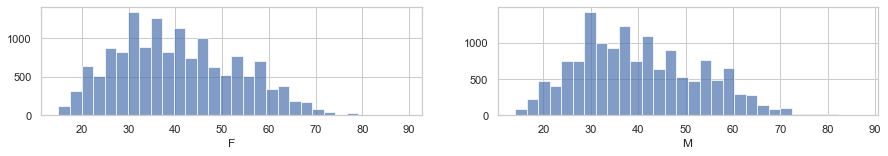

Данные: длит_отн


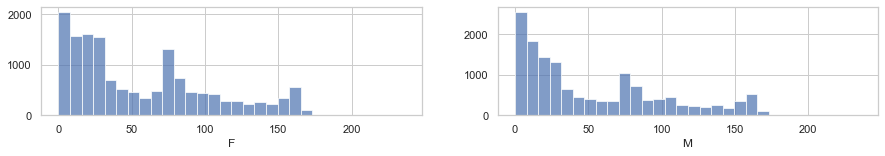

Данные: кредиты


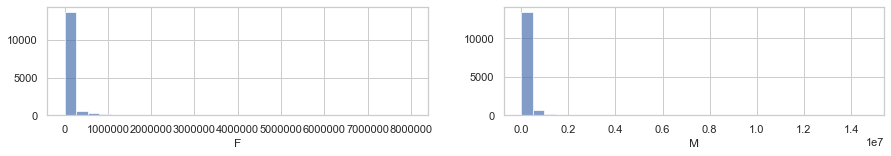

Данные: депозиты


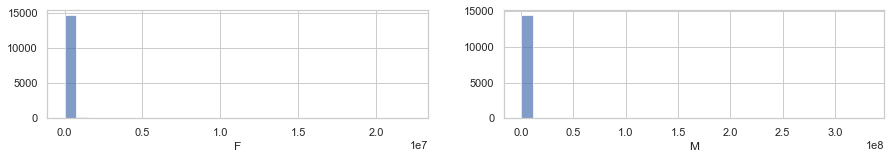

Данные: счета


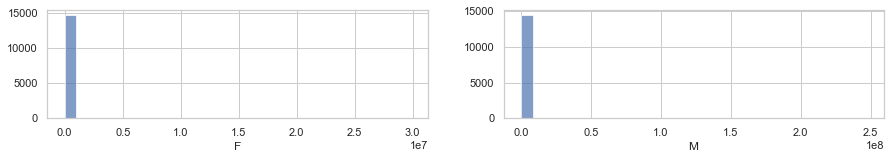

Данные: кол-во_трат


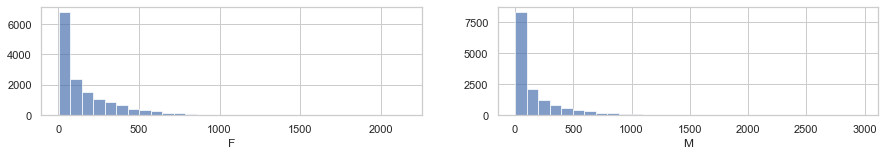

Данные: сумма_трат


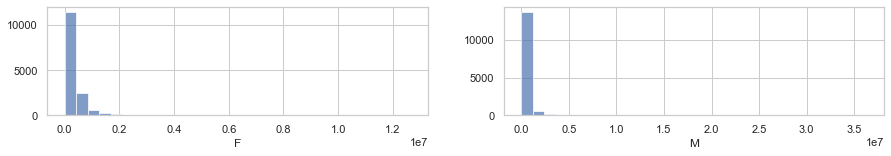

Данные: ср_транзакц


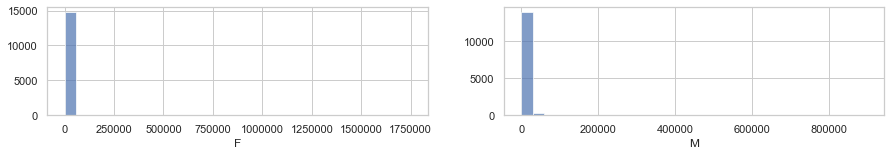

Данные: транзакц_к_балансу


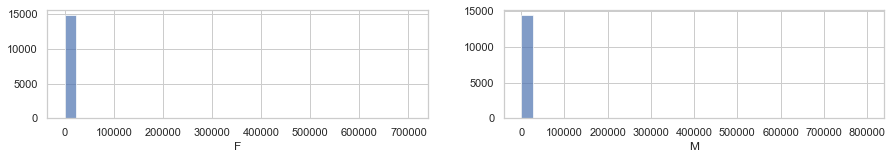

Данные: доход_клиент


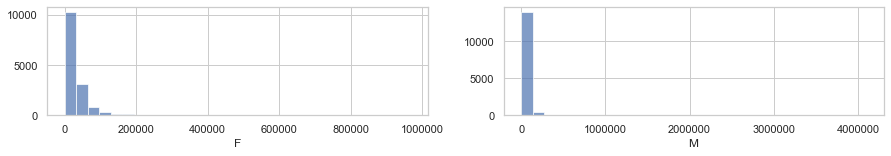

Данные: чист_доход_бизнес


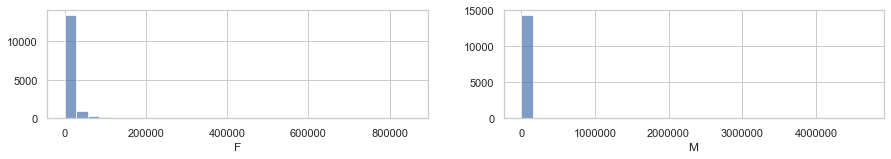

In [669]:
# возьмём созданный ранее список c полями датасета, исключив из него "пол"
parameters_bin = ['возраст', 'длит_отн', 
                  'кредиты', 'депозиты', 'счета',
                  'кол-во_трат', 'сумма_трат', 'ср_транзакц', 'транзакц_к_балансу',
                  'доход_клиент', 'чист_доход_бизнес']  

# посмотрим на распределения значений данных из списка в виде distplot

for param in parameters_bin:
    # создали список с номерами 5 кластеров по возрастанию
    client_cls = data_parameters2['пол'].sort_values().unique() 
    
    # создали для каждого признака свою строку с 5-ю колонками
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 2)) 
    
    # выводим название признака
    print('Данные: ' + param)
    
    # перебираем в цикле все признаки, при этом для каждого кластера строим отдельный график
    for client_cl, ax in zip(client_cls, axes.flat):
        sns.distplot(data_parameters2[data_parameters2['пол'] == client_cl][param], bins=30, hist_kws=dict(alpha=0.7),
                      axlabel=client_cl, ax = ax, kde=False);
        
    plt.show();

***Выводы***

Существенного отличия между банковскими данными мужчин и женщин ***не выявлено***, разве что максимальная сумма трат и дохода у мужчин значительно выше, но это уже статистические выбросы.
